In [3]:
import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

 ### Tweets Clustering 

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venkat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venkat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\venkat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
modi = pd.read_csv('E:/Term3/Unstructured/narendramodi_tweets.csv')
#modi.head(5)

In [8]:
print(modi['created_at'].min())
print(modi['created_at'].max())

2016-03-09 12:22:10
2017-01-31 11:00:07


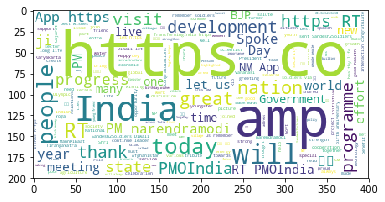

In [9]:
input_string = ''.join(modi['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

In [10]:
docs_modi = modi['text'].str.lower().str.replace('[^a-z#@ ]','')
def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean_modi = docs_modi.apply(clean_sentence)
docs_clean_modi.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2       rt @pmoindia empow marginalis httpstcowwsqgwdk
3    rt @pmoindia commit welfar farmer httpstcopaaf...
4    rt @pmoindia improv qualiti life poor httpstco...
Name: text, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 5)
vectorizer.fit(docs_clean_modi)
dtm_modi = vectorizer.transform(docs_clean_modi)
dtm_modi

<3220x1228 sparse matrix of type '<class 'numpy.int64'>'
	with 24800 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dtm_modi)
kmeans.labels_


array([1, 1, 2, ..., 1, 1, 3])

In [13]:
labels = kmeans.predict(dtm_modi)
print(labels)
centroids = kmeans.cluster_centers_
print(centroids)

[1 1 2 ... 1 1 3]
[[0.00381679 0.         0.         ... 0.01145038 0.03053435 0.00381679]
 [0.00222222 0.00222222 0.00555556 ... 0.01333333 0.02222222 0.00222222]
 [0.00436681 0.         0.         ... 0.         0.00436681 0.        ]
 [0.00109349 0.00218699 0.00164024 ... 0.00710771 0.00765446 0.00164024]]


In [14]:
Df = pd.DataFrame({'text':docs_clean_modi, 'Cluster':labels})

In [41]:
c1 = Df.query('Cluster==1')
c1.head()

,Cluster,text
0,1,presid address wonder encapsul india strength ...
1,1,rashtrapati ji address hous parliament indepth...
8,1,rt @rashtrapatibhvn proactiv act east polici g...
9,1,rt @rashtrapatibhvn standup india initi govt p...
10,1,rt @rashtrapatibhvn pradhan mantri fasal bima ...


In [43]:
c2 = Df.query('Cluster==2')
c2.head()

,Cluster,text
2,2,rt @pmoindia empow marginalis httpstcowwsqgwdk
3,2,rt @pmoindia commit welfar farmer httpstcopaaf...
4,2,rt @pmoindia improv qualiti life poor httpstco...
5,2,rt @pmoindia financi inclus poverti allevi htt...
192,2,rt @meaindia book select speech pm @narendramo...


In [44]:
c3 = Df.query('Cluster==3')
c3.head()

,Cluster,text
6,3,rt @rashtrapatibhvn fourdecad old demand onera...
7,3,rt @rashtrapatibhvn govern taken bold decis in...
11,3,rt @rashtrapatibhvn govern taken variou step t...
12,3,rt @rashtrapatibhvn govern commit provid shelt...
13,3,rt @rashtrapatibhvn govern taken mani initi im...


In [46]:
c4 = Df.query('Cluster==0')
c4.head()

,Cluster,text
16,0,rt @rashtrapatibhvn resili amp forbear demonst...
30,0,@akalid amp @bjppunjab govern commit safeti se...
62,0,hh moham bin zay al nahyan amp agre expand def...
75,0,india amp uae share strong bond friendship amp...
125,0,urg student parent amp teacher share thought a...


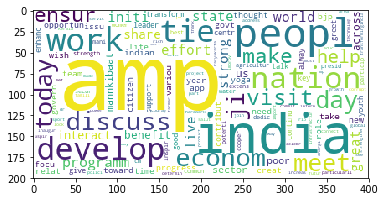

In [19]:
input_string = ''.join(c1['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

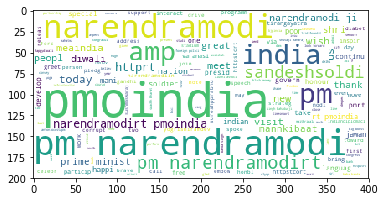

In [20]:
input_string = ''.join(c2['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

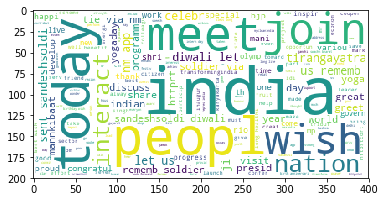

In [21]:
input_string = ''.join(c3['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

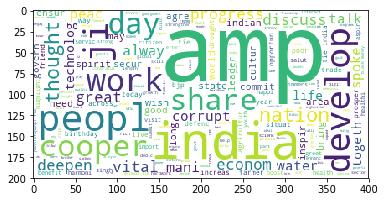

In [22]:
input_string = ''.join(c4['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

### Sentiment Analysis (Supervised vs Unsupervised)

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [48]:
hs = pd.read_csv('E:/Term3/Unstructured/hotstar.allreviews_Sentiments.csv')
#hs.head(5)

### Unsupervised

In [25]:
def get_sentiment(text):
    sentiment = SentimentIntensityAnalyzer()
    compound = sentiment.polarity_scores(text)['compound']
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
hs['sentiment_vader'] = hs['Reviews'].apply(get_sentiment)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(hs['Sentiment_Manual'],hs['sentiment_vader'])

0.5503661191371463

### Supervised

In [29]:
hs_df = hs[['Lower_Case_Reviews','Sentiment_Manual']]
hs_df.head()

,Lower_Case_Reviews,Sentiment_Manual
0,hh,Negative
1,no,Negative
2,@hotstar_helps during paymnt for premium subsc...,Negative
3,@hotstartweets i am currently on jio network a...,Negative
4,@hotstartweets the episodes of sarabhai vs sar...,Negative


In [30]:
hs_rev = hs_df['Lower_Case_Reviews'].str.lower().str.replace('[^a-z ]', '')
hs_clean = hs_rev.apply(clean_sentence)

In [31]:
vectorizer_hot = CountVectorizer()
vectorizer_hot.fit(hs_clean)
dtm_hs = vectorizer_hot.transform(hs_clean)
dtm_hs

<5053x6145 sparse matrix of type '<class 'numpy.int64'>'
	with 37273 stored elements in Compressed Sparse Row format>

In [32]:
df_dtm_hs = pd.DataFrame(dtm_hs.toarray(), columns=vectorizer_hot.get_feature_names())
(df_dtm_hs == 0).sum().sum() 

31013412

In [33]:
from sklearn.model_selection import train_test_split
hs_train_x, hs_test_x = train_test_split(df_dtm_hs, test_size=0.2, random_state=100)

In [34]:
hs_train_y = hs.iloc[hs_train_x.index]['Sentiment_Manual']
hs_test_y = hs.iloc[hs_test_x.index]['Sentiment_Manual']

In [36]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(hs_train_x, hs_train_y)
mnb_predict_class = mnb_model.predict(hs_test_x)
accuracy_score(hs_test_y, mnb_predict_class)

0.7359050445103857

### Compare the accuracy with supervised models and comment whether supervised or unsupervised gives best accuracy

#### **Supervised algorithm gives better Accuracy than Unsupervised

### MultiLine Chart for comparing no. of positive, negative and neutral review

In [37]:
df_ht_pos = hs[hs['sentiment_vader']=='Positive'][['Created_Date','sentiment_vader']].groupby('Created_Date').count().reset_index()
df_ht_neg = hs[hs['sentiment_vader']=='Negative'][['Created_Date','sentiment_vader']].groupby('Created_Date').count().reset_index()
df_ht_neu = hs[hs['sentiment_vader']=='Neutral'][['Created_Date','sentiment_vader']].groupby('Created_Date').count().reset_index()
#df_ht_pos.head()


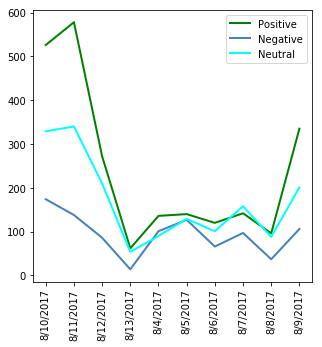

In [42]:
plt.figure(figsize=(5,5))
plt.plot('Created_Date', 'sentiment_vader', data=df_ht_pos, color='green', linewidth=2, label='Positive')
plt.plot('Created_Date', 'sentiment_vader', data=df_ht_neg, color='steelblue', linewidth=2, label='Negative')
plt.plot('Created_Date', 'sentiment_vader', data=df_ht_neu, color='cyan', linewidth=2, label='Neutral')
plt.xticks(rotation=90)
plt.legend()
plt.show()